$$ \mathcal{H} = \sigma_{1}^{x} \otimes \sigma_{2}^{x} + \sigma_{2}^{x} \otimes \sigma_{3}^{x} + \sigma_{3}^{x} \otimes \sigma_{1}^{x} + h \Big(\sigma_{1}^{z}
    + \sigma_{2}^{z} + \sigma_{3}^{z} \Big) $$

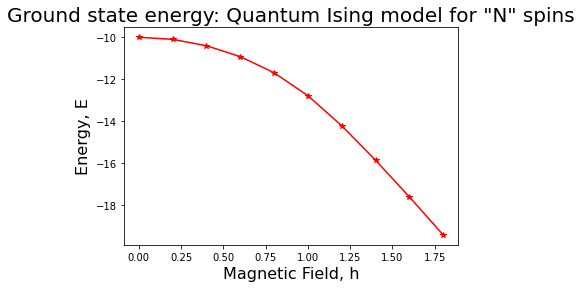

In [2]:
# Exact Diagonalization!
import numpy as np
from matplotlib import pyplot as plt
from numpy import linalg as LA
import sys 

E = np.eye(2)
EE = np.eye(4)
X = [[0.0, 1.0],[1.0, 0]]   # \sigma_x
Z = [[1.0, 0.0],[0.0, -1.0]]  # \sigma_z
XX = np.kron(X,X)
HXX = np.kron(XX,E) + np.kron(E, XX) + np.kron(X,np.kron(E,X))
# (XX,E) means 1 & 2 are X and third is identity. 
HZ = np.kron(Z,EE) + np.kron(E,np.kron(Z,E)) + np.kron(EE,Z) 
h = np.arange(0.0, 2.0, 0.2).tolist() 
Nsteps = int(np.shape(h)[0])
E0 = np.zeros(Nsteps)

# Now generalize ...
def buildH(N, h): 

    if N > 12:
      print ("Lower N to finish quickly")
      sys.exit(1) 

    HXX = XX
    HZ = np.kron(Z,E) + np.kron(E,Z)
    for n in range (3, N+1):
        HXX = np.kron(HXX,E)+ np.kron(np.eye(2**(n-2)), XX)
        HZ =  np.kron(HZ,E) + np.kron(np.eye(2**(n-1)), Z)
    HXX = HXX + np.kron(X, np.kron(np.eye(2**(N-2)), X)) 
    H = HXX + (h*HZ)
    return H

for i in range (0, Nsteps):
    #H = HXX + (h[i] * HZ)
    H = buildH(10, h[i])
    D, U = LA.eigh(H) 
    E0[i] = min(D)
 
plt.plot(h, E0, marker="*", color = "r")
plt.title('Ground state energy: Quantum Ising model for "N" spins', fontsize=20)
plt.xlabel('Magnetic Field, h', fontsize=16)
plt.ylabel('Energy, E', fontsize=16) 
plt.show()